In [113]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
data = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [114]:
def training(X, y):
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    A = np.dot(Xbar.T, Xbar)
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return (w[1:], w[0])

coefficients, intercept = training(X_train, y_train)
print('Coefficents: ', coefficients)
print('Intercept: ', intercept)

Coefficents:  [-9.83848341e-02  4.89022583e-02  3.77565540e-02  3.37326508e+00
 -1.77176952e+01  3.93316038e+00 -1.29741394e-03 -1.37866029e+00
  3.03657067e-01 -1.15773893e-02 -9.59676833e-01  1.29949349e-02
 -4.92708888e-01]
Intercept:  33.28644623131311


In [115]:
def prediction(X, coefficients, intercept):
    y_predict = X.dot(coefficients) + intercept
    return y_predict

In [116]:
def MSE(X, y_target, coefficients, intercept):
    y_predict = prediction(X, coefficents, intercept)
    assert len(y_predict) == len(y_target)
    mse = sum((y_target-y_predict)**2) / len(y_target)
    return mse

mse = MSE(X_test, y_test, coefficents, intercept)
print(mse)

25.730881828472743


In [117]:
def visualize_results(y_predict, y_target):
    """ this function plot your y_predict and y_predict to see how closed they are"""
    
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()


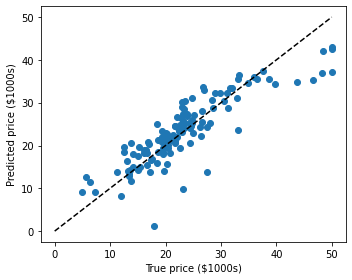

In [118]:
visualize_results(prediction(X_test, coefficients, intercept), y_test)